In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd 
import seaborn as sns
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/firstexamegypt/FirstExam.csv


In [3]:
# reading file
firstExam=pd.read_csv("/kaggle/input/firstexamegypt/FirstExam.csv")
firstExam.head()

,desk_no,name,schoolName_Arabic,schoolName_English,administration_Arabic,administration_English,government_Arabic,government_English,branch,Percentage,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102300,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,20,unscheduled,M
1,102301,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,23,unscheduled,M
2,102302,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,17,14,unscheduled,M
3,102303,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,21,22,unscheduled,M
4,102304,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,19,21,unscheduled,M


In [4]:
firstExam.isnull().sum() # find null in the data

desk_no                   0
name                      0
schoolName_Arabic         0
schoolName_English        0
administration_Arabic     0
administration_English    0
government_Arabic         0
government_English        0
branch                    0
Percentage                0
student_type              0
status                    0
arabic                    0
first_foreign_lang        0
second_foreign_lang       0
pure_mathematics          0
history                   0
geography                 0
philosophy                0
psychology                0
chemistry                 0
biology                   0
geology                   0
applied_math              0
physics                   0
total                     0
religion                  0
altarbiat_alwatania       0
economics_statistics      0
gender                    0
dtype: int64

In [5]:
firstExam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698195 entries, 0 to 698194
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   desk_no                 698195 non-null  int64  
 1   name                    698195 non-null  object 
 2   schoolName_Arabic       698195 non-null  object 
 3   schoolName_English      698195 non-null  object 
 4   administration_Arabic   698195 non-null  object 
 5   administration_English  698195 non-null  object 
 6   government_Arabic       698195 non-null  object 
 7   government_English      698195 non-null  object 
 8   branch                  698195 non-null  object 
 9   Percentage              698195 non-null  object 
 10  student_type            698195 non-null  object 
 11  status                  698195 non-null  object 
 12  arabic                  698195 non-null  object 
 13  first_foreign_lang      698195 non-null  object 
 14  second_foreign_lang 

In [6]:
# converting to float using delimiter
firstExam['Percentage']= (firstExam['Percentage'].str.split('%', expand= True)[0]).astype('float')

In [40]:
newdf1= firstExam[['Percentage', 'gender','branch']] # making new dataframe by selected column
newdf2 = newdf1[(newdf1.branch !='undefined')] # filtering out 'undefined'
newdf= newdf2[['Percentage', 'gender']] # making new dataframe by taking Percentage and group column

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percentage', ylabel='Density'>

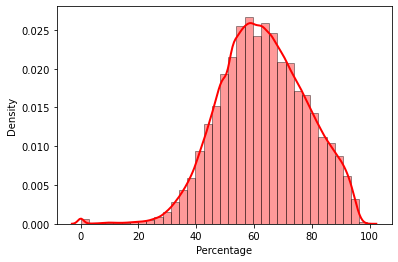

In [75]:
#plotting the dataset
sns.distplot(newdf['Percentage'], hist=True, kde=True,bins=35, color = 'red',hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 2})

In [31]:
newdf.groupby('gender').mean() # mean by gender

,Percentage
gender,
F,61.768081
M,64.790003


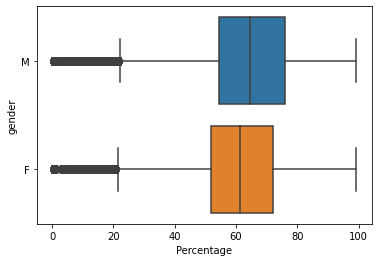

In [42]:
ax= sns.boxplot(x='Percentage',y='gender',data=newdf)

In [25]:
male_percent=newdf['Percentage'][newdf['gender'] == 'M']
female_percent= newdf['Percentage'][newdf['gender'] == 'F']

## Test for Normality

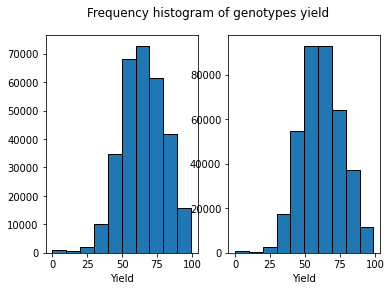

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Historgram')
ax1.hist(male_percent, bins=10, histtype='bar', ec='k') 
ax2.hist(female_percent, bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Percentage")
ax2.set_xlabel("Percentage")
plt.show()

The figure above shows that the data are not normally distributed

### Test for Homogenity of Variance

In [59]:
stats.levene(male_percent,female_percent, center= 'mean')

LeveneResult(statistic=593.9246817952891, pvalue=3.9950297896612356e-131)

The group has different variance

### Testing if Male has higher percent than female

In [61]:
stats.mannwhitneyu(x=male_percent, y=female_percent, alternative = 'greater')

MannwhitneyuResult(statistic=64589769563.5, pvalue=0.0)

As p value is less than 0.05, there is sufficient evidence male has higer percentage than female

References:
1. https://www.statology.org/normality-test-python/
2. https://www.reneshbedre.com/blog/mann-whitney-u-test.html